In [2]:
# If load_boston does not work then download the data and use this.
# Data : https://github.com/afnan47/sem8/blob/master/DL/1_boston_housing.csv
import pandas as pd
df = pd.read_csv("./1_boston_housing.csv")

In [3]:
df.head(10)

crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [4]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100


11/11 [==============================] - 1s 20ms/step - loss: 580.0929 - mae: 22.2394 - val_loss: 595.8469 - val_mae: 22.4679
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 533.9413 - mae: 21.1325 - val_loss: 536.0203 - val_mae: 21.0460
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 462.6252 - mae: 19.2324 - val_loss: 441.1452 - val_mae: 18.5468
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 352.6362 - mae: 16.0656 - val_loss: 309.7702 - val_mae: 14.4898
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 228.1875 - mae: 12.1916 - val_loss: 184.4204 - val_mae: 9.9204
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 151.5686 - mae: 9.7450 - val_loss: 134.6753 - val_mae: 8.4666
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 130.4904 - mae: 8.9140 - val_loss: 120.8924 - val_mae: 8.0470
Epoch 8/100
11/11 [========================

In [8]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 0s/step - loss: 21.5299 - mae: 2.9535
Mean squared error on test data:  21.529895782470703
Mean absolute error on test data:  2.9534881114959717


In [9]:
y_preds = model.predict(X_test)

5/5 [==============================] - 0s 0s/step


In [10]:
y_test = y_test.to_numpy()

In [11]:
pred_v_true = pd.DataFrame([[y_preds][:], [y_test][:]])

In [12]:
pred_v_true.head()

0
0  [[13.744166], [27.18321], [43.81906], [15.7379...
1  [[15.0], [26.6], [45.4], [20.8], [34.9], [21.9...

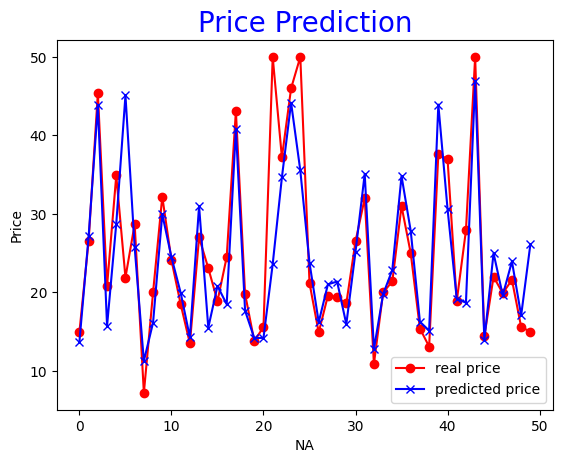

In [15]:
import matplotlib.pyplot as plt
plt.plot(y_test[:50],color="red",label="real price",marker='o')
plt.plot(y_preds[:50],color="blue",label="predicted price",marker='x',)
plt.title("Price Prediction",fontsize=20,color="blue")
plt.xlabel("NA")
plt.ylabel("Price")
plt.legend()
plt.show()
